In [1]:
# Might take a while if not run yet
!pip install qiskit

In [2]:
import numpy as np

from qiskit import QuantumCircuit, transpile, assemble, Aer, execute
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_bloch_multivector, plot_histogram
from resources import dj_problem_oracle
from resources.grader import *

In [3]:
pi = np.pi

# I. Single Qubit Rotations
Let's start with some basic 1-qubit gates and observe their effects on the bloch sphere to build some QC intuition!

While quabit operations are often referred to as *bit flips* or *phase flip*, you will come to realize that every operation is just some sort of rotation around our bloch sphere. Thinking in terms of state vectors or Dirac notation can be difficult sometimes so understanding and using the bloch sphere representation can be super helpful. That being said, in this notebook we will explore a few different representation and you will be able to test your understanding.


__A few quick notes about Qiskit:__

Qiskit is IBM's quantum computing library. It is one of the most popular packages out there (especially for beginners) but certainly not the only one. Google has Cirque, Microsoft has Q#, Xanadu has Pennylane (good for QML), Rigetti has PyQuil, and there are more. There are a bunch of similarities and differences between them and we will stick primarily with qiskit but we encourage you to explore and experiment with others

By default, qiskit initializes all qubits to $|0\rangle$. When building a qunatum program in qiskit, you typically start by with `qc = QuantumCircuit(n_qubits, n_cbits)` which instantiates a quantum circuit object with a however many qubits and classical bits you want. You can then add gates to the circuit with a commands that follow the structure `qc.gate(qubit)`. This would apply whatever gate you specified in `gate` (e.g. `x` or `h`) to the specified qubit index. Here are some common gates:

    qc.x(0)      # rotation by Pi around the x-axis
    qc.y(0)      # rotation by Pi around the y-axis
    qc.z(0)      # rotation by Pi around the z-axis
    qc.rx(pi,0)  # rotation by Pi around the x-axis
    qc.s(0)      # rotation by Pi/2 around the z-axis
    qc.sdg(0)    # rotation by -Pi/2 around the z-axis
    qc.h(0)      # rotation by Pi around an axis located halfway between x and z
    
Let's take a look at an example of how to use `QuantumCircuit`:

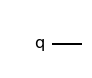

In [4]:
# Declare a 1 qubit circuit
qc = QuantumCircuit(1)

# A helpful visualization of the circuit (mpl stands for MatPlotLib)
qc.draw('mpl')

The Bloch Sphere is a common way to visualize the state of a qubit so let's explore it to understand how the state changes with operations

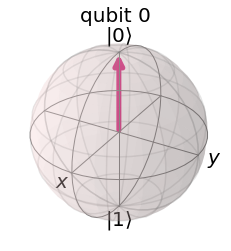

In [5]:
state = Statevector.from_instruction(qc)
plot_bloch_multivector(state)

Let's add a simple bit-flip:

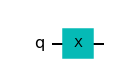

In [6]:
qc.x(0)

qc.draw('mpl')

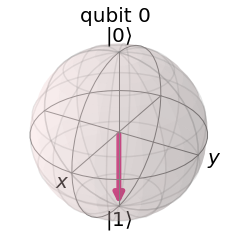

In [7]:
state = Statevector.from_instruction(qc)
plot_bloch_multivector(state)

See how the arrow inverted and is not pointing at the $|1\rangle$ state. You can also think of it as rotating around the x-axis by $\pi$. Let's explore this a little more

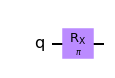

In [8]:
qc = QuantumCircuit(1)
qc.rx(pi, 0)
qc.draw('mpl')

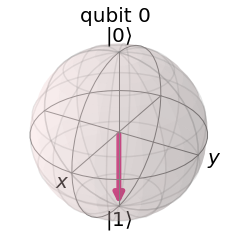

In [9]:
state = Statevector.from_instruction(qc)
plot_bloch_multivector(state)

### Exercise 1
Perform a rotation around the x-axis by $\frac{\pi}{2}$ radians and visualize on the bloch sphere. Submit the resulting state.

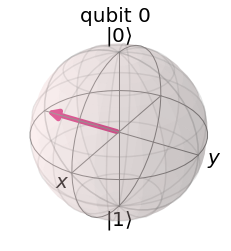

In [10]:
qc = QuantumCircuit(1)

## Insert your code in this cell using the circuit `qc`
qc.rx(pi/2, 0)

state = Statevector.from_instruction(qc)
plot_bloch_multivector(state)

In [11]:
grade_ex_1(state)

Congratulations! You passed question 1


### Exercise 2
Create a circuit that outputs the following bloch sphere:

<div><img src="resources/plusi.png" width="200"></div> 


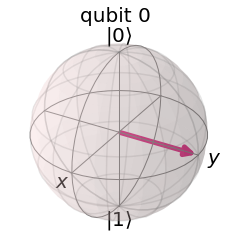

In [12]:
qc = QuantumCircuit(1)

## Insert your code in this cell using the circuit `qc`
qc.rx(-pi/2, 0)

state = Statevector.from_instruction(qc)
plot_bloch_multivector(state)

In [13]:
grade_ex_2(qc)

Congratulations! You passed question 2


### Exercise 3
Now let's create superposition. Reach the state $|+\rangle = \frac{1}{\sqrt2} (|0\rangle+|1\rangle)$ and visualize it on the bloch sphere.

__Bonus:__ Find at least 2 different ways to do it


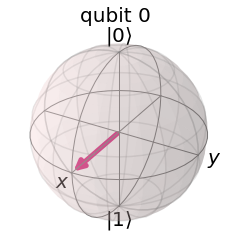

In [14]:
qc = QuantumCircuit(1)

## Insert your code in this cell using the circuit `qc`
qc.ry(pi/2, 0) # or qc.h(0)

state = Statevector.from_instruction(qc)
plot_bloch_multivector(state)

In [15]:
state = Statevector.from_instruction(qc)
grade_ex_3(state)

Congratulations! You passed question 2


### Exercise 4
Using the resulting circuit from exercise 3, apply and observe both a bit-flip and seperately a phase-flip. What happens?

In [16]:
## Insert your code in this cell using the two circuits
qc_bit = QuantumCircuit(1)
qc.h(0)
qc.x(0)  # does nothing - why!

qc_phase = QuantumCircuit(1)
qc.h(0)
qc.z(0)  # essentially a bit-flip in the X basis!

In [17]:
# Discuss your solution with on of the exec
# You can (and should) write down the math of X(|0>+|1>) to see this effect.
# Recall from Lin Alg that when a matrix applied to a vector and the vector stays the same, we have
# found an eigenvector of that matrix. Eigenvectors and eigenvectors are really important in QC
# and in this case the Hadamard operator is actually performing a change of basis from the Z basis
# or "computational basis" (i.e. |0> and |1>) to the X basis (which is spanned by |+> and |->).
# This is why the Z operator now has the effect of a bit flip when we are used it it doing nothing
# but sometimes apply a phase (since we always applied it in the Z basis).

# II. Measurement
Now that you are a bloch sphere expert and have some intuition with the state vector representation, we have to ask the question: what happens when you measure the qubit?

Consider a qubit in the good old superposition state: $|+\rangle = \frac{1}{\sqrt2} (|0\rangle+|1\rangle)$. What would we get when we measure it?

Let's take a look and then explain the quantum mechanics later. Start by creating the superposition:

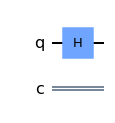

In [18]:
qc = QuantumCircuit(1, 1)  # need a classical bit to store the measurement result
qc.h(0)
qc.draw('mpl')

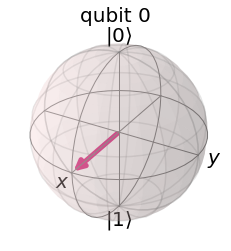

In [19]:
state = Statevector.from_instruction(qc)
plot_bloch_multivector(state)

We can also take a look at the statevector:

In [20]:
print(f'1/sqrt(2) = {1/np.sqrt(2)}\n')
print(state)

1/sqrt(2) = 0.7071067811865475

Statevector([0.70710678+0.j, 0.70710678+0.j],
            dims=(2,))


We see that it is in an equal superposition of $|0\rangle$ and $|1\rangle$ with amplitudes of $\frac{1}{\sqrt2}$ with no complex component (hence the 0 coefficient on python's complex number `j`).

Now measure:

Measurement results: {'1': 473, '0': 527}


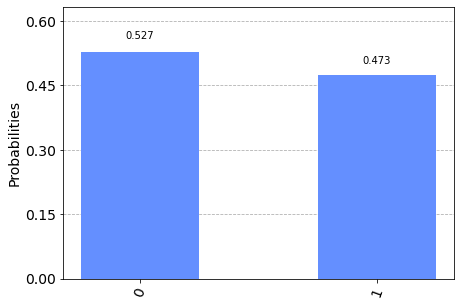

In [21]:
qc.measure(0, 0) # we perform a measurement on qubit q_0 and store the information on the classical bit c_0
backend = Aer.get_backend('qasm_simulator') # we choose the simulator as our backend
counts = execute(qc, backend, shots = 1000).result().get_counts() # we run the simulation and get the counts
print(f'Measurement results: {counts}')
plot_histogram(counts) # let us plot a histogram to see the possible outcomes and corresponding probabilities

You can see after executing the circuit 1000 times, we ended up with a (roughly) even split of 0 and 1. This is what we would expect since the qubit was in a superpoisition of 0 and 1.

# III. Multi-Qubit Gates

Great work! Now lets get into some more interesting operations that involve both single and mutiple qubit gates. Just as before, qiskit operations follow a structure but for multi-qubits gates they look like `qc.cgate(c, t)` which applies a controlled-`gate` to the circuit with qubit `c` being the control and qubit `t` being the target. Common examples are given below:

    qc.cx(c,t)         # controlled-X (= CNOT) gate with control qubit c and target qubit t
    qc.cz(c,t)         # controlled-Z gate with control qubit c and target qubit t
    qc.crx(theta,c,t)  # controlled rotation around x-axis with control qubit c and target qubit t
    qc.ccx(c1,c2,t)    # controlled-controlled-X (= Toffoli) gate with control qubits c1 and c2 and target qubit t 
    qc.swap(a,b)       # SWAP gate that swaps the states of qubit a and qubit b

Visualizing multiple qubits gets a little tricky as we will see. There are many ways around it but the method we will use is measring the result and plotting the resulting histogram.


Let's take a loot at the CNOT gate.

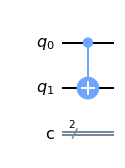

In [22]:
qc = QuantumCircuit(2, 2)
qc.cnot(0,1)

qc.draw('mpl')

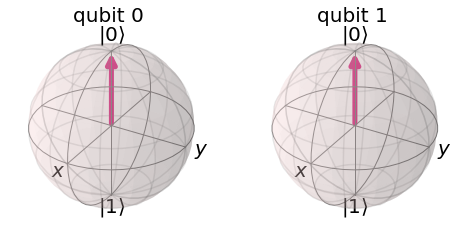

In [23]:
state = Statevector.from_instruction(qc)
plot_bloch_multivector(state)

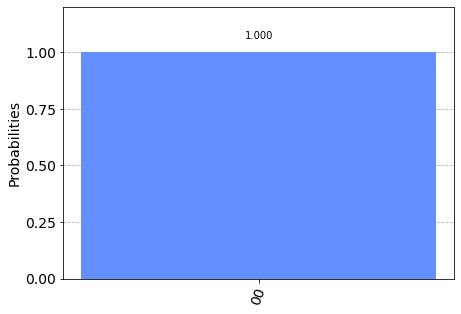

In [24]:
qc.measure(0, 0) # we perform a measurement on qubit q_0 and store the information on the classical bit c_0
qc.measure(1, 1) # we perform a measurement on qubit q_1 and store the information on the classical bit c_1
backend = Aer.get_backend('qasm_simulator') # we choose the simulator as our backend
counts = execute(qc, backend, shots = 1000).result().get_counts() # we run the simulation and get the counts
plot_histogram(counts) # let us plot a histogram to see the possible outcomes and corresponding probabilities

Cool. That did nothing. That makes sense though since the control qubit was in $|0\rangle$. If it was in the state $|1\rangle$ we would expect the second state to also get flipped from $|0\rangle$ to $|1\rangle$ (assuming it is in state $|0\rangle$). 

What if the control was in a superposition?

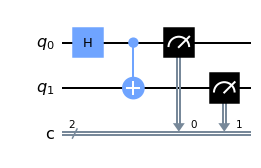

In [25]:
qc = QuantumCircuit(2, 2)
qc.h(0)  # create superposition
qc.cnot(0,1)

qc.measure(0, 0) # we perform a measurement on qubit q_0 and store the information on the classical bit c_0
qc.measure(1, 1) # we perform a measurement on qubit q_1 and store the information on the classical bit c_1

qc.draw('mpl')

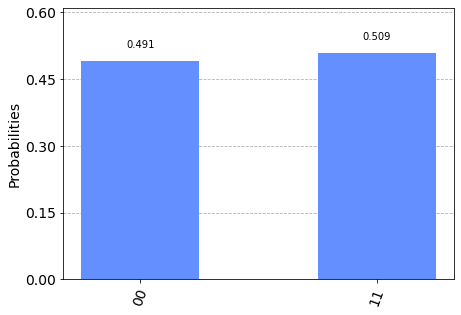

In [26]:
backend = Aer.get_backend('qasm_simulator') # we choose the simulator as our backend
counts = execute(qc, backend, shots = 1000).result().get_counts() # we run the simulation and get the counts
plot_histogram(counts) # let us plot a histogram to see the possible outcomes and corresponding probabilities

No that's actually cool - we are now in an entangled quantum state! Specifically the state: 
$|\psi\rangle = \frac{1}{\sqrt2} (|00\rangle+|11\rangle)$

What if we were to use the bloch vector visualizer for this state? Note that the visualizer were were using shows each individual qubit's state - not the entier system.

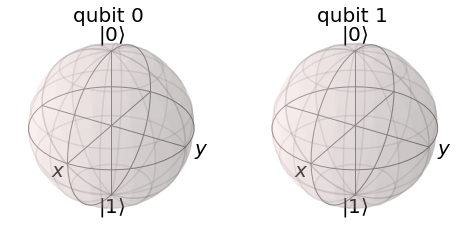

In [27]:
qc = QuantumCircuit(2)
qc.h(0)
qc.cnot(0,1)

state = Statevector.from_instruction(qc)
plot_bloch_multivector(state)

Nothing! Why is that?

### Exercise 5
You may have notices that we just created one of the famous Bell States, namely $|\beta_{00}\rangle$. Now lets create them all!

#### i) Create the Bell state: $|\beta_{01}\rangle = \frac{1}{\sqrt2} (|00\rangle - |11\rangle)$

In [28]:
qc = QuantumCircuit(2, 2)

## Insert your code here - do not measure anything, we just want you to add the circuit
qc.x(0)
qc.h(0)
qc.cnot(0,1)

In [29]:
state = Statevector.from_instruction(qc)
grade_ex_5_1(state)

Congratulations! You passed question 5.1


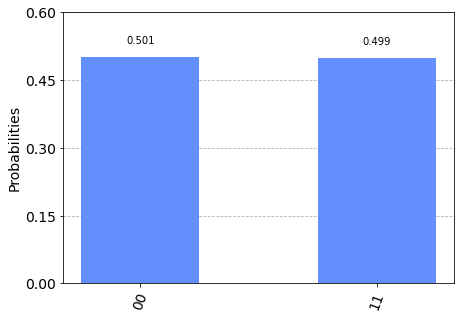

In [30]:
qc.measure(0, 0)
qc.measure(1, 1)

backend = Aer.get_backend('qasm_simulator')
counts = execute(qc, backend, shots = 1000).result().get_counts()
plot_histogram(counts)

#### ii) Create the Bell state: $|\beta_{10}\rangle = \frac{1}{\sqrt2} (|01\rangle + |10\rangle)$

In [31]:
qc = QuantumCircuit(2, 2)

## Insert your code here - do not measure anything, we just want you to add the circuit
qc.x(1)
qc.h(0)
qc.cnot(0,1)

In [32]:
state = Statevector.from_instruction(qc)
grade_ex_5_2(state)

Congratulations! You passed question 5.2


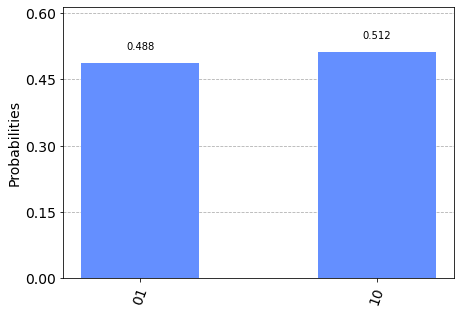

In [33]:
qc.measure(0, 0)
qc.measure(1, 1)

backend = Aer.get_backend('qasm_simulator')
counts = execute(qc, backend, shots = 1000).result().get_counts()
plot_histogram(counts)

#### iii) Create the Bell state: $|\beta_{11}\rangle = \frac{1}{\sqrt2} (|01\rangle - |10\rangle)$

In [34]:
qc = QuantumCircuit(2, 2)

## Insert your code here - do not measure anything, we just want you to add the circuit
qc.x(0)
qc.x(1)
qc.h(0)
qc.cnot(0,1)

In [35]:
state = Statevector.from_instruction(qc)
grade_ex_5_3(state)

Congratulations! You passed question 5.3


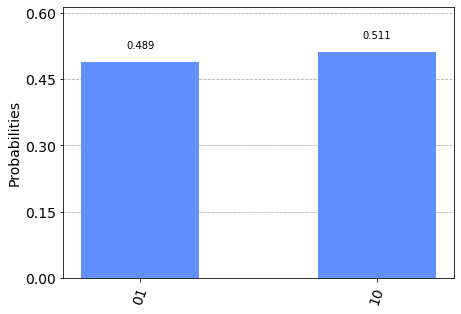

In [36]:
qc.measure(0, 0)
qc.measure(1, 1)

backend = Aer.get_backend('qasm_simulator')
counts = execute(qc, backend, shots = 1000).result().get_counts()
plot_histogram(counts)

In [37]:
# Constants for below:
qasm_sim = Aer.get_backend('qasm_simulator')
n = 4

# IV. Deutch-Josza Algorithm

The Deutsch-Jozsa algorithm was the first example of a quantum algorithm that performs better than the best classical algorithm. It showed that there can be advantages to using a quantum computer as a computational tool for a specific problem.

You learned a little about $\textit{oracles}$ in yesterday's Grover's Aglortihm workshop. As it turns out, many quantum algoritms revolve around the notion of oracles. An oracle is a function that can be considered as a 'black box'. We generally want to find out specific properties of this function. We do this by asking questions to the oracle (or *querying* the oracle). The *query complexity* is then defined as the minimum number of queries in order to find these properties.


To get familiar with the use of oracles and the idea of *quantum parallelism* we will now consider the Deutsch-Josza problem. We will see that the quantum solution has a drastically lower query complexity than its classical counterpart. First, let's understand the problem we are trying to solve.


## Deutsch-Jozsa Problem

We are given a hidden Boolean function $f$, whose input is a string of bits and outputs either $0$ or $1$. Formally:

$$f(\{x_0,x_1,x_2,...\}) \rightarrow 0 \textrm{ or } 1 \textrm{ , where } x_n \textrm{ is } 0 \textrm{ or } 1$$

The property of the given Boolean function is that it is guaranteed to either be *balanced* or *constant*. A constant function returns all $0$'s or all $1$'s for any input, while a balanced function returns $0$'s for exactly half of all inputs and $1$'s for the other half. Our task is to determine whether the given function is balanced or constant.

Let's get coding. In the Deutsch-Josza problem you are given an unknown orcale. We have built a few different oracles for you to experiment with and they can be accessed as follows:

In [38]:
oracle_numbr = 4  # determines the oracle (can range from 1 to 5)
oracle = dj_problem_oracle(oracle_numbr) # gives one out of 5 mystery oracles
oracle.name = "DJ-Oracle"

This function gives a certain oracle with 5 input qubits. The last qubit ($q_4$) will be the output. In order to get a feeling for the oracle, let us create a circuit to which we add the oracle such that we can pass it different input strings and then measure the output of $q_4$. Note that this is percisely how you would tackle the problem classically - that is, querying the oracle with a bunch of differnt inputs until you know it's either constant or balanced.

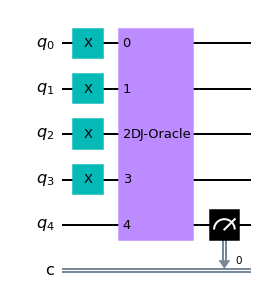

In [39]:
n = 4 # number of qubits

def dj_classical_query(n, input_str):
    
    # build a quantum circuit with n qubits and 1 classical readout bit
    dj_circuit = QuantumCircuit(n+1,1)
    
    # Prepare the initial state corresponding to your input bit string
    for i in range(n):
        if input_str[i] == '1':
            dj_circuit.x(i)
    
    # append oracle to the circuit
    dj_circuit.append(oracle, range(n+1))
    
    # measure the fourth qubit 
    dj_circuit.measure(n, 0)
    
    return dj_circuit
    
input_str = '1111'
dj_circuit = dj_classical_query(n, input_str)
dj_circuit.draw('mpl')

So we essentially just prepare the circuit corresponding to our input bit string by applying nothing (or the identity) to qubits we want to be 0 and applying the bit-flip gate to the qubits we want to be 1. Then we send that to the oracle with an extra output bit and finally measure.

Now we simulate the results to find the outcome of this circuit. Try different input bit strings to see the corresponding outputs!

Output counts: {'0': 1024}


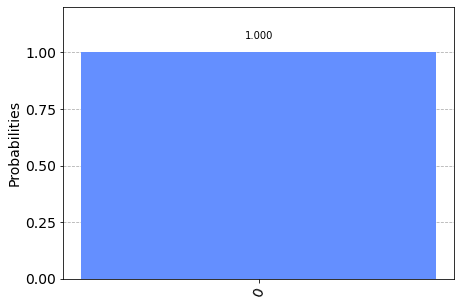

In [40]:
input_str = '1001'  # change this to try different inputs and observe the output

dj_circuit = dj_classical_query(n, input_str)

# Run circuit and visualize result:
transpiled_dj_circuit = transpile(dj_circuit, qasm_sim)
qobj = assemble(transpiled_dj_circuit, qasm_sim)
results = qasm_sim.run(qobj).result()
answer = results.get_counts()

print(f'Output counts: {answer}')
plot_histogram(answer)

### Exercise 6
What is the minimum and maximum number of oracle queries you would have to make to determine if the oracle is constant or balanced for this 4 bit input?

In [41]:
min_q = 2
max_q = 9

In [42]:
grade_ex_6(min_q, max_q)

Congratulations! You passed question 6


### Exercise 7
What about for the general $n$ bit input string? Write your answer as a function of $n$. See the example below for the quadratic $result = n^2 +n+1$:
```
result = lambda n: n**2 + n + 1
```

Please ask a PM if you need clarificaiton.

In [43]:
min_q = lambda n: 2
max_q = lambda n: 2**(n-1) + 1

In [44]:
grade_ex_7(min_q, max_q)

Congratulations! You passed question 7


##  Quantum Solution to the Deutsch-Josza Problem

Using a quantum computer, we can find out if the oracle is constant or balanced with 100% confidence after __only one call__ to the function $f(x)$, provided we have the function $f$ implemented as a quantum oracle. This oracle must complete the following map: 

$$\vert x\rangle \vert y\rangle \textrm{  to  } \vert x\rangle \vert y \oplus f(x)\rangle$$

where $\oplus$ is addition modulo $2$. So $\vert x\rangle$ is our input bit string state and $\vert y\rangle$ is our output qubit, so we are essentially just adding the result of our query to the output qubit.


__Here is our quantum algorithm:__

Prepare two quantum registers. The first is an $n$-qubit register initialised to $|0\rangle^{\otimes n}$ (i.e. $n$ qubits in $\vert 0\rangle$), and the second is a one-qubit register initialised to $|-\rangle =\frac{1}{\sqrt{2}}\left(|0\rangle - |1 \rangle \right)$. Note, that with Qiskit states are described as $\vert b_3 b_2 b_1 b_0\rangle_{q_3q_2q_1q_0}$, so the last bit $b_0$ corresponds to the state of the first qubit. So, we want to initialize the state 

$$\vert \psi_0 \rangle = \vert -\rangle \otimes \vert0\rangle^{\otimes n}$$

### Exercise 8
Initialize the state:  $\vert \psi_0 \rangle = \vert -\rangle \otimes \vert0\rangle^{\otimes n}$

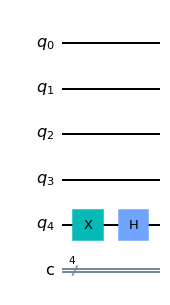

In [45]:
n=4
def psi_0(n):
    # Arg: n = number of qubits
    
    qc = QuantumCircuit(n+1,n)
    
    # Build the state (|00000> - |10000>)/sqrt(2)
    qc = QuantumCircuit(n+1,n)
    qc.x(n)
    qc.h(n)
    
    return qc

dj_circuit = psi_0(n)
dj_circuit.draw('mpl')

In [46]:
grade_ex_8(dj_circuit)

Congratulations! You passed question 8


As we know from above, applying the quantum bit oracle to any state $\vert x\rangle \vert y\rangle$ yields the state $\vert x\rangle \vert y \oplus f(x)\rangle$. Since we have prepared the state $|y\rangle$ in the state $|-\rangle = \frac{1}{\sqrt{2}} (|0\rangle - |1\rangle)$, the output of the oracle for any input bitstring $x$ is given by:

$$
\begin{aligned}
  |x\rangle |(-)\oplus f(x)\rangle & = \frac{1}{\sqrt{2}}\vert x\rangle (\vert f(x)\rangle - \vert 1 \oplus f(x)\rangle) \\
  & = \frac{1}{\sqrt{2}} (-1)^{f(x)}|x\rangle (|0\rangle - |1\rangle ) \\
  & = (-1)^{f(x)}|x\rangle |-\rangle
\end{aligned}
$$

Thus, we have created a phase oracle acting on the bit string $x$. Note that applying the oracle has the effect of applying a phase of $-1$ to values where $f(x)$ is odd.

Before applying the oracle, we need to create our input state on the first $n$ qubits though. For that we want an equal superposition state, so that the total state on all $n+1$ qubits is given by $$\vert \psi_1 \rangle = \frac{1}{\sqrt{2^{n+1}}}\sum_{x=0}^{2^n-1} \vert x\rangle \left(|0\rangle - |1 \rangle \right)$$ 

### Exercise 9
Build the state $|\psi_1\rangle$. (An equal superposition of input bits).

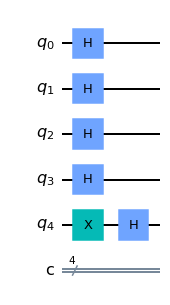

In [47]:
def psi_1(n):
    # Arg: n = number of qubits

    # obtain the |psi_0> = |00001> state
    qc = psi_0(n)
    
    # Build the state |psi_1>
    for i in range(n):
        qc.h(i)

    return qc

dj_circuit = psi_1(n)
dj_circuit.draw('mpl')


In [48]:
grade_ex_9(dj_circuit)

Congratulations! You passed question 9


Now we are ready to apply our oracle to the prepared superposition state $\vert \psi_1 \rangle$. This gives the state

$$
\begin{aligned}
    \vert \psi_2 \rangle &= \frac{1}{\sqrt{2^{n+1}}}\sum_{x=0}^{2^n-1} \vert x\rangle (\vert f(x)\rangle - \vert 1 \oplus f(x)\rangle) \\
    &= \frac{1}{\sqrt{2^{n+1}}}\sum_{x=0}^{2^n-1}(-1)^{f(x)}|x\rangle (|0\rangle - |1\rangle ) \\
    &= \frac{1}{\sqrt{2^{n}}}\sum_{x=0}^{2^n-1}(-1)^{f(x)}|x\rangle |-\rangle.
\end{aligned}
$$

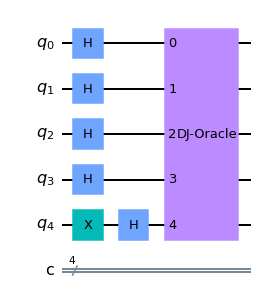

In [49]:
def psi_2(oracle,n):
    
    # circuit to obtain psi_1
    qc = psi_1(n)
    
    # append the oracle
    qc.append(oracle, range(n+1))
    
    return qc

dj_circuit = psi_2(oracle, n)
dj_circuit.draw('mpl')

In the final part of our algorithm we disregard the outcome on our second register and we apply an n-fold Hadamard to our first register. Afterwards we measure the outcome on these qubits.

### Exercise 10
Apply the n-fold Hadamard (Hadamard Transform) to our input qubits and measure.

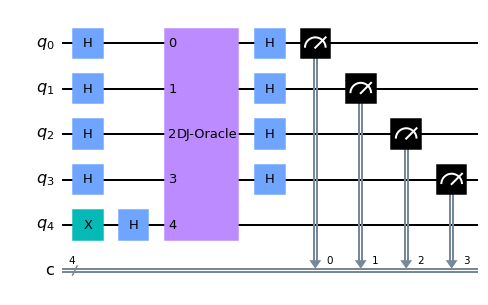

In [50]:
def dj_quantum_circuit(oracle, n): # note that this exercise also depends on the code in the functions psi_0 and psi_1
    qc = psi_2(oracle, n)
    
    # apply n-fold hadamard gate
    for i in range(n):
        qc.h(i)

    # add the measurement by connecting qubits to classical bits
    q_c_bit_map = list(range(n))
    qc.measure(q_c_bit_map, q_c_bit_map)

    return qc

dj_circuit = dj_quantum_circuit(oracle, n)
dj_circuit.draw('mpl')

In [51]:
grade_ex_10(dj_circuit)

Congratulations! You passed question 10


At this point the second single qubit register may be ignored. Applying a Hadamard gate to each qubit in the first register yields the state:
        $$
        \begin{aligned}
            \lvert \psi_3 \rangle 
                & = \frac{1}{2^n}\sum_{x=0}^{2^n-1}(-1)^{f(x)}
                    \left[ \sum_{y=0}^{2^n-1}(-1)^{x \cdot y} 
                    \vert y \rangle \right] \\
                & = \frac{1}{2^n}\sum_{y=0}^{2^n-1}
                    \left[ \sum_{x=0}^{2^n-1}(-1)^{f(x)+x \cdot y} \right]
                    \vert y \rangle,
        \end{aligned}
        $$
       
where $x \cdot y = x_0y_0 \oplus x_1y_1 \oplus \ldots \oplus x_{n-1}y_{n-1}$ is the sum of the bitwise product.

So what is so good about this final state $\vert\psi_3\rangle$? Well it may be hard to see but upon measuring the state, if the resulting bit string is $000\dots0$ then $f(x)$ is constant, otherwise it is balanced. That is a big claim but let's take a look at the probability of the state $\vert\psi_3\rangle = \vert00\dots0\rangle$ (Note that the below is some more involved quantum mechanics that you may not be familiar with - that is ok. We haven't covered this yet but we are using something called the Born Rule):

let $C_y = \frac{1}{2^n} \sum_{x=0}^{2^n-1}(-1)^{f(x)+x \cdot y}$

$$
\begin{aligned}
   P[00\dots0]
        & = \vert \langle 00\dots0 \vert \psi_3\rangle\vert^2 \\
        & = \vert \sum_{y}{} C_y \langle 00\dots0 \vert \psi_3\rangle \vert^2 \\
        & = \vert C_{00\dots0} \vert^2 \\
        & = \vert \frac{1}{2^n} \sum_{x=0}^{2^n-1}(-1)^{f(x)+0} \vert^2 \\
\end{aligned}
$$

Recall that $f(x)$ is either balanced or constant so our sum becomes:
$$ 
\sum_{x=0}^{2^n-1}(-1)^{f(x)+0} \vert^2 =   \left\{
\begin{array}{ll}
      +2^n & \text{if }f(x)=0 \\
      -2^n & \text{if }f(x)=1 \\
      0 & f(x) \text{ balanced} \\
\end{array} 
\right. 
$$

So we have:

$$ 
P[00\dots0] =   \left\{
\begin{array}{ll}
      1 & \text{if } f \text{ constant} \\
      0 & \text{if } f \text{ balanced} \\
\end{array} 
\right. 
$$

\*\* **Which means that our function is constant if and only if we measure a $\vert 00\dots0 \rangle$.** \*\*


Let us now run the circuit including the measurement of the first register on the simulator:

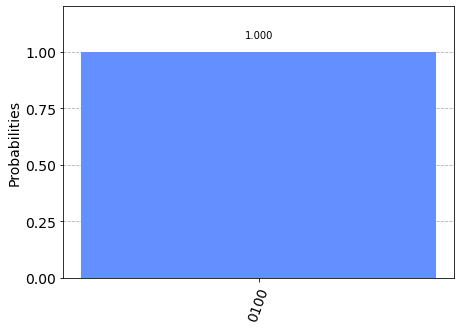

In [52]:
qasm_sim = Aer.get_backend('qasm_simulator')
transpiled_dj_circuit = transpile(dj_circuit, qasm_sim)
qobj = assemble(transpiled_dj_circuit)
results = qasm_sim.run(qobj).result()
answer = results.get_counts()
plot_histogram(answer)

### Exercise 11

Determine if the other oracles are even or balanced and submit your answer as list with 0 corresponding to constant and 1 corresponding to balanced:

In [53]:
oracle_res = [0,1,0,0,1]

In [54]:
grade_ex_11(oracle_res)

Congratulations! You passed question 10
